In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer.data.shape

(569, 30)

In [7]:
cancer.target.shape   # 0/1 비율이 다르다.-> 층화추출 

(569,)

In [8]:
#  데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

In [9]:
# 모델링
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [10]:
tree.score(X_train, y_train), tree.score(X_test, y_test)   #오버피팅

(1.0, 0.9370629370629371)

In [12]:
tree.tree_.max_depth

7

In [13]:
#복잡도 조절 매개변수 
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [14]:
tree.score(X_train, y_train), tree.score(X_test, y_test) 

(0.9882629107981221, 0.951048951048951)

### 시각화 

In [16]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot',
                class_names=['cancer','normal'], 
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

In [17]:
### 특성 중요도 
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [18]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
# 특성 중요도 시각화 
import matplotlib.pyplot as plt 
import numpy as np 

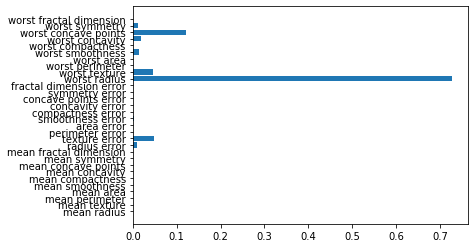

In [21]:
def plot_feature(model):
    n_features = cancer.data.shape[1]   #열 
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.show()
plot_feature(tree)

In [ ]:
# shift + tab 

In [28]:
tree.feature_importances_ != 0

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True, False])

In [29]:
cancer.feature_names[tree.feature_importances_ != 0]

array(['radius error', 'texture error', 'smoothness error',
       'worst radius', 'worst texture', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='<U23')

### RamdomForest 적용

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [33]:
forest = RandomForestClassifier(n_estimators= 100,random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.958041958041958)

In [37]:
forest = RandomForestClassifier(n_estimators= 1000,random_state=0, max_depth=3)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(0.9788732394366197, 0.958041958041958)

### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.958041958041958)

In [41]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.958041958041958)

In [44]:
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=2
                                  , learning_rate=0.01)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9671361502347418, 0.9370629370629371)

#### 최적의 파라미터 찾기

In [47]:
from sklearn.model_selection import GridSearchCV

param_list = {'n_estimators':[10, 50, 100, 200],
              'max_depth':[1,2,3,4,5],
              'learning_rate':[0.0001, 0.001,0.01, 0.1, 1]}
gs = GridSearchCV(gbrt, param_list, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.01,
                                                  loss='deviance', max_depth=2,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [48]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}

In [49]:
gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
gs.best_score_    # train data의 score 

0.9694835680751174

In [51]:
gs.score(X_test, y_test)

0.965034965034965